500 (500, 2)
500 (500, 2)
1000


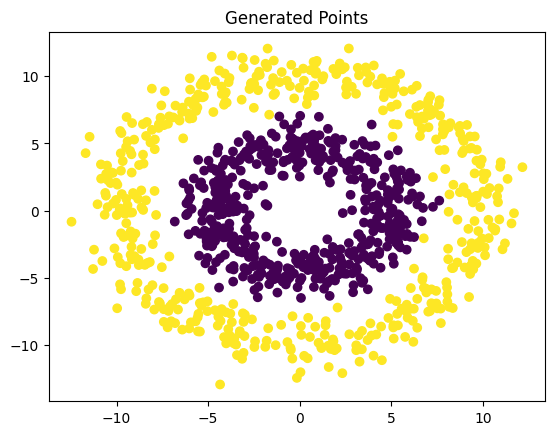

i: 0 ll: -5505.140578990539 classification rate: 0.5
i: 2 ll: -3416.718185028568 classification rate: 0.5
i: 4 ll: -2122.7715242279405 classification rate: 0.49
i: 6 ll: -1504.8247590422402 classification rate: 0.485
i: 8 ll: -1099.4462379833908 classification rate: 0.485
i: 10 ll: -857.899823288072 classification rate: 0.479
i: 12 ll: -763.3154940638492 classification rate: 0.46399999999999997
i: 14 ll: -731.3943520858475 classification rate: 0.46699999999999997
i: 16 ll: -714.8371736465525 classification rate: 0.478
i: 18 ll: -703.371237443954 classification rate: 0.479
i: 20 ll: -694.5757019719993 classification rate: 0.487
i: 22 ll: -687.5444467756504 classification rate: 0.487
i: 24 ll: -681.7488343433437 classification rate: 0.487
i: 26 ll: -676.8343394281768 classification rate: 0.491
i: 28 ll: -672.5664959056579 classification rate: 0.493
i: 30 ll: -668.7881290444809 classification rate: 0.492
i: 32 ll: -665.3821625702833 classification rate: 0.491
i: 34 ll: -662.2615037550717 

i: 286 ll: -545.9472994106789 classification rate: 0.7
i: 288 ll: -545.4172048028254 classification rate: 0.7
i: 290 ll: -544.8872810802598 classification rate: 0.7010000000000001
i: 292 ll: -544.3561311008305 classification rate: 0.7030000000000001
i: 294 ll: -543.8194470587064 classification rate: 0.7070000000000001
i: 296 ll: -543.2768359039748 classification rate: 0.7070000000000001
i: 298 ll: -542.7311109386746 classification rate: 0.708
i: 300 ll: -542.186555385689 classification rate: 0.71
i: 302 ll: -541.6409932572484 classification rate: 0.7110000000000001
i: 304 ll: -541.0945053077901 classification rate: 0.712
i: 306 ll: -540.5468169555754 classification rate: 0.714
i: 308 ll: -539.992581558573 classification rate: 0.7150000000000001
i: 310 ll: -539.4329070473982 classification rate: 0.716
i: 312 ll: -538.8665746051245 classification rate: 0.7170000000000001
i: 314 ll: -538.2892378867109 classification rate: 0.718
i: 316 ll: -537.7102490669853 classification rate: 0.718
i: 3

MovieWriter stderr:
[NULL @ 0000021a1bb07bc0] Unable to find a suitable output format for 'dounut.html'
dounut.html: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'dounut.html']' returned non-zero exit status 1.

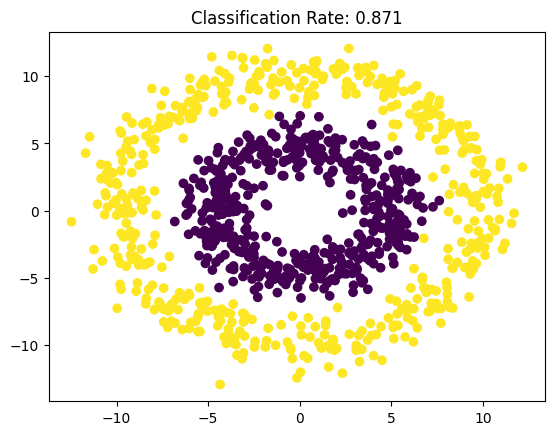

In [5]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.pyplot import ion, ioff, isinteractive, draw

import matplotlib.animation as animation

from celluloid import Camera

# for binary classification! no softmax here


def forward(X, W1, b1, W2, b2):

    # sigmoid

    # Z = 1 / (1 + np.exp( -(X.dot(W1) + b1) ))


    # tanh

    # Z = np.tanh(X.dot(W1) + b1)


    # relu

    Z = X.dot(W1) + b1

    Z = Z * (Z > 0)


    activation = Z.dot(W2) + b2

    Y = 1 / (1 + np.exp(-activation))

    return Y, Z



def predict(X, W1, b1, W2, b2):

    Y, _ = forward(X, W1, b1, W2, b2)

    return np.round(Y)



def derivative_w2(Z, T, Y):

    # Z is (N, M)

    return (T - Y).dot(Z)


def derivative_b2(T, Y):

    return (T - Y).sum()



def derivative_w1(X, Z, T, Y, W2):

    # dZ = np.outer(T-Y, W2) * Z * (1 - Z) # this is for sigmoid activation

    # dZ = np.outer(T-Y, W2) * (1 - Z * Z) # this is for tanh activation

    dZ = np.outer(T-Y, W2) * (Z > 0) # this is for relu activation

    return X.T.dot(dZ)



def derivative_b1(Z, T, Y, W2):

    # dZ = np.outer(T-Y, W2) * Z * (1 - Z) # this is for sigmoid activation

    # dZ = np.outer(T-Y, W2) * (1 - Z * Z) # this is for tanh activation

    dZ = np.outer(T-Y, W2) * (Z > 0) # this is for relu activation

    return dZ.sum(axis=0)



def get_log_likelihood(T, Y):

    return np.sum(T*np.log(Y) + (1-T)*np.log(1-Y))



def RedOrBlue(P, X_in, X_out):

    #sort into red or blue based on index in P: 0 = red, 1 = blue

    xred = []

    yred = []

    xblue = []

    yblue = []

    for i in range(0,len(P)):

        if i < 500 and P[i] == 0:

            xred.append(X_in[i,0])

            yred.append(X_in[i,1])

        elif i < 500 and P[i] == 1:

            xblue.append(X_in[i - 500,0])

            yblue.append(X_in[i - 500,1])

        elif i >= 500 and P[i] == 1:

            xblue.append(X_out[i-500,0])

            yblue.append(X_out[i-500,1])

        elif i >= 500 and P[i] == 0:

            xred.append(X_out[i-500,0])

            yred.append(X_out[i-500,1])


    xyred = np.concatenate([[xred], [yred]]).T

    xyblue = np.concatenate([[xblue], [yblue]]).T

    bigX = np.concatenate([ xyred, xyblue ])

    return bigX


def main():

    # donut example

    N = 1000

    R_inner = 5

    R_outer = 10


    # distance from origin is radius + random normal

    # angle theta is uniformly distributed between (0, 2pi)

    R1 = np.random.randn(N//2) + R_inner

    theta = 2*np.pi*np.random.random(N//2)

    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T


    R2 = np.random.randn(N//2) + R_outer

    theta = 2*np.pi*np.random.random(N//2)

    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    print(len(X_inner), X_inner.shape)

    print(len(X_outer), X_outer.shape)


    X = np.concatenate([ X_inner, X_outer ])


    Y = np.array([0]*(N//2) + [1]*(N//2))

    print(len(Y))

    plt.scatter(X[:,0], X[:,1], c=Y)

    plt.title("Generated Points")

    plt.show()



    n_hidden = 4

    W1 = np.random.randn(2, n_hidden)

    b1 = np.random.randn(n_hidden)

    W2 = np.random.randn(n_hidden)

    b2 = np.random.randn(1)

    LL = [] # keep track of log-likelihoods

    learning_rate = 0.00005

    regularization = 0.2

    last_error_rate = None

    camera = Camera(plt.figure())

    for i in range(500):

        pY, Z = forward(X, W1, b1, W2, b2)

        ll = get_log_likelihood(Y, pY)

        prediction = predict(X, W1, b1, W2, b2)

        er = np.abs(prediction - Y).mean()

        LL.append(ll)

        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)

        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)

        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)

        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)

#        print(prediction - Y)

        if i % 2 == 0:

            print("i:", i, "ll:", ll, "classification rate:", 1 - er)

        bigX = RedOrBlue(prediction, X_inner, X_outer)

        string = "Classification Rate: {0:5}".format((1 - er))

        plt.title(string)


        plt.scatter(bigX[:,0], bigX[:,1], c=Y)

        camera.snap()



    anim = camera.animate(blit=True)

    #anim.save('dounut.html')


    plt.show()

    plt.plot(LL)

    plt.show()


if __name__ == '__main__':

    main()